In [35]:
# import stuff
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
dirpath = os.getcwd()
data_path = os.path.join(dirpath, "..", "delpro_vms", "data")
# read vistit data
visit_df = pd.read_csv(os.path.join(data_path, "milk_videos_visit.csv"))
all_df = pd.read_csv(os.path.join(data_path, "delpro_visit_lactation.csv"))
# read features
feature_df = pd.read_csv("udder_features_median.csv")
# read lactation data
lact_df = pd.read_csv(os.path.join(data_path, "merged2_videos_lactation.csv")).drop_duplicates(subset='cow', keep="first")


## kick off percetn and distance

In [27]:
temp = feature_df.merge(lact_df, on = "cow", how = "left")

<Axes: xlabel='front_geo', ylabel='kickoff_front_perc'>

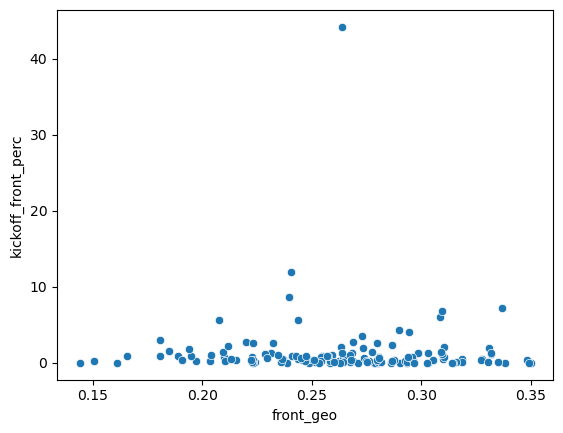

In [46]:
sns.scatterplot( y = 'kickoff_front_perc', x = 'front_geo',  data = temp)

<Axes: xlabel='back_geo', ylabel='kickoff_back_perc'>

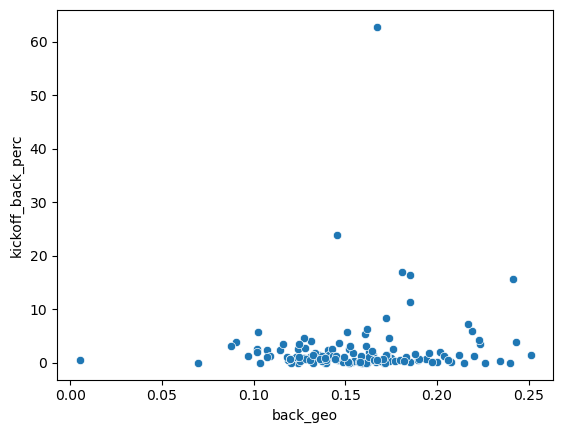

In [45]:
sns.scatterplot( y = 'kickoff_back_perc', x = 'back_geo',  data = temp)

## kick off predict

In [51]:
temp = feature_df.merge(all_df, left_on = "cow", right_on = "animal_number", how = "left")

In [ ]:
from pymer4.models import Lmer

model = Lmer("Survived  ~ Age  + (1|animal_number)",
             data=temp, family = 'binomial')

print(model.fit())

In [49]:
all_df 

,animal_number,lactation_number,date,begin_time,end_time,yield,days_in_milk,conductivity_lf,conductivity_lr,conductivity_rf,...,kickoff_lf,kickoff_lr,kickoff_milkings,kickoff_rf,kickoff_rr,alternative_attach,device_name,incomplete,is_incomplete,incomplete_milkings
0,971,4,2023-09-08,9/8/2023 5:33 PM,5:37 PM,7.77,0.0,3.46,3.56,3.30,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_3,NaN,Unchecked,0.0
1,971,4,2023-09-09,9/9/2023 7:20 AM,7:26 AM,9.38,1.0,4.51,4.22,3.11,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_3,NaN,Unchecked,0.0
2,971,4,2023-09-09,9/9/2023 6:04 PM,6:09 PM,10.19,1.0,4.92,4.75,5.16,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_3,NaN,Unchecked,0.0
3,971,4,2023-09-10,9/10/2023 7:43 AM,7:50 AM,16.33,2.0,4.92,4.83,5.03,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_3,NaN,Unchecked,0.0
4,971,4,2023-09-10,9/10/2023 5:29 PM,5:34 PM,10.28,2.0,4.74,4.71,5.16,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_3,NaN,Unchecked,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163252,1371,1,2023-12-02,12/2/2023 8:27 PM,8:37 PM,19.36,280.0,3.83,3.97,3.95,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_4,NaN,Unchecked,0.0
163253,1371,1,2023-12-03,12/3/2023 9:47 PM,9:57 PM,22.81,281.0,3.90,4.12,3.97,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_4,NaN,Unchecked,0.0
163254,1371,1,2023-12-04,12/4/2023 2:56 PM,3:03 PM,14.38,282.0,3.63,3.89,3.82,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_4,NaN,Unchecked,0.0
163255,1371,1,2023-12-05,12/5/2023 12:01 PM,12:09 PM,19.99,283.0,4.03,4.17,4.14,...,Unchecked,Unchecked,0.0,Unchecked,Unchecked,Normal,VMS_4,NaN,Unchecked,0.0
